# *Importing* important *Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# *Data Loading*

In [2]:
from google.colab import drive
drive.mount('/content/Gdrive')

Mounted at /content/Gdrive


In [3]:
kidney =pd.read_csv('/content/Gdrive/MyDrive/kidney_disease.csv')

In [4]:
kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
kidney.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

# *Data Visualisation*

In [7]:
kidney.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

Here 'ckd\t' is same as 'ckd'

In [8]:
kidney.loc[kidney.classification=='ckd\t','classification']='ckd'

In [9]:
kidney.classification.unique()

array(['ckd', 'notckd'], dtype=object)

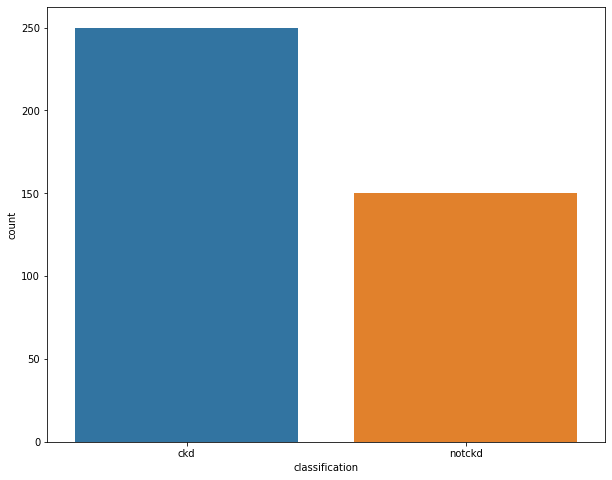

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x='classification',data=kidney)

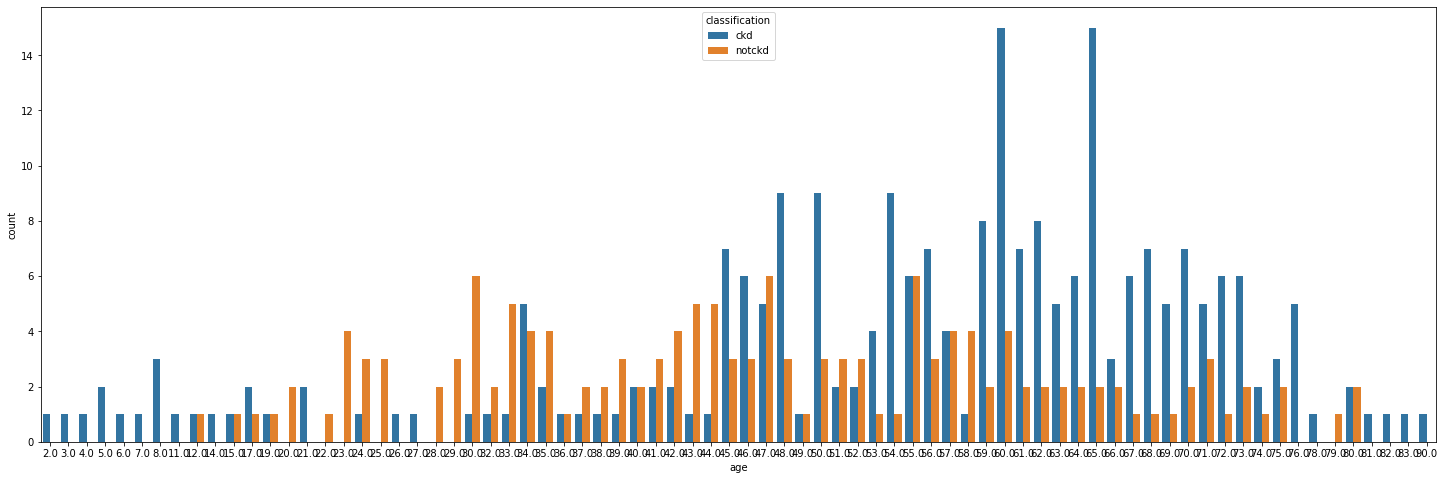

In [11]:
plt.figure(figsize=(25,8))
sns.countplot(x='age',data=kidney,hue='classification')

The most CKD occurs between the ages of 45 to 76 years

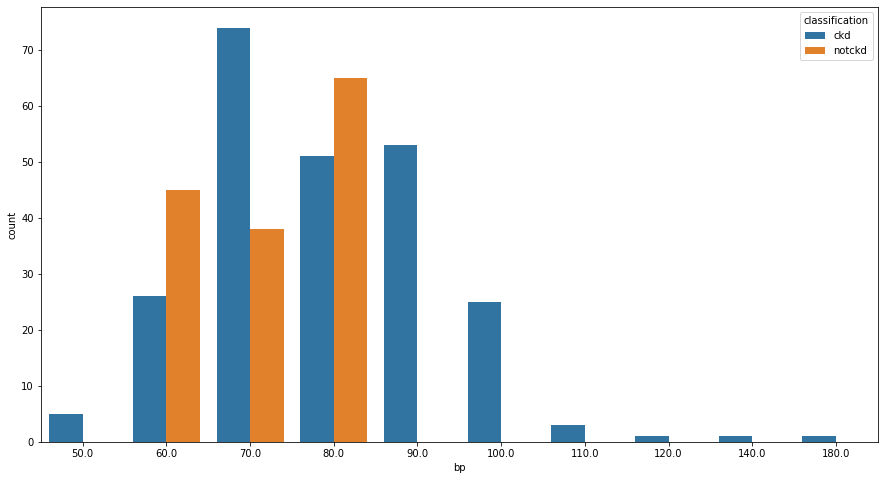

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='bp',data=kidney,hue='classification')

1. If the bp is above 85,there is a high chance of CKD
2. Most CKD patients have bp between 55 to 85 but non CKD is also in that range

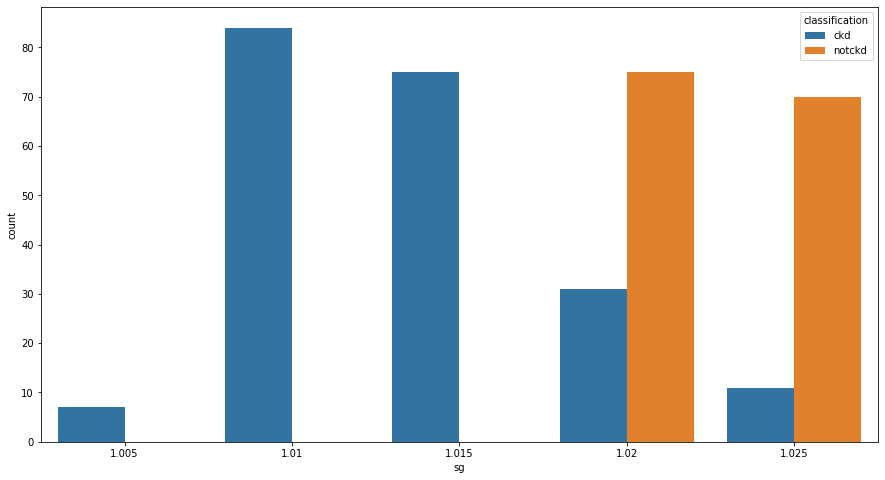

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x='sg',data=kidney,hue='classification')

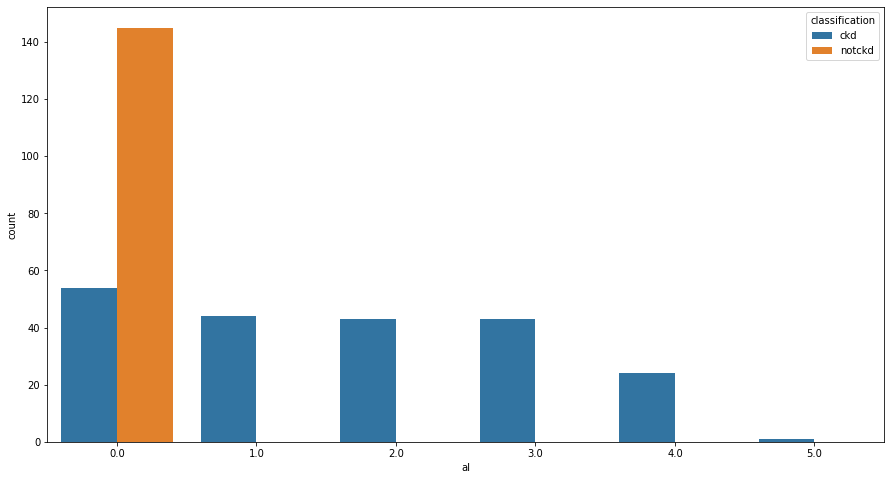

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='al',data=kidney,hue='classification')

More al indicates more risk of CKD

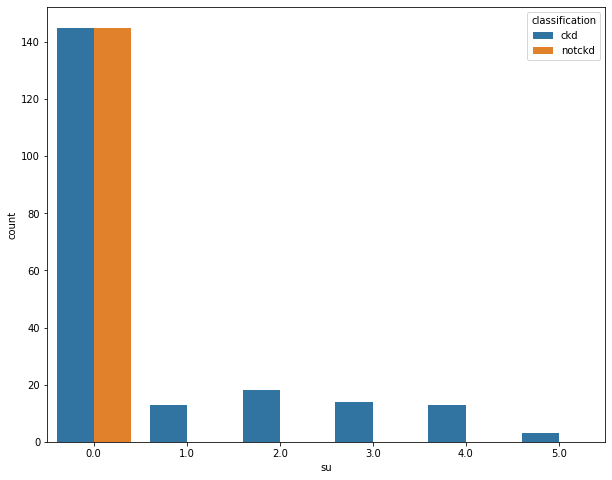

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='su',data=kidney,hue='classification')

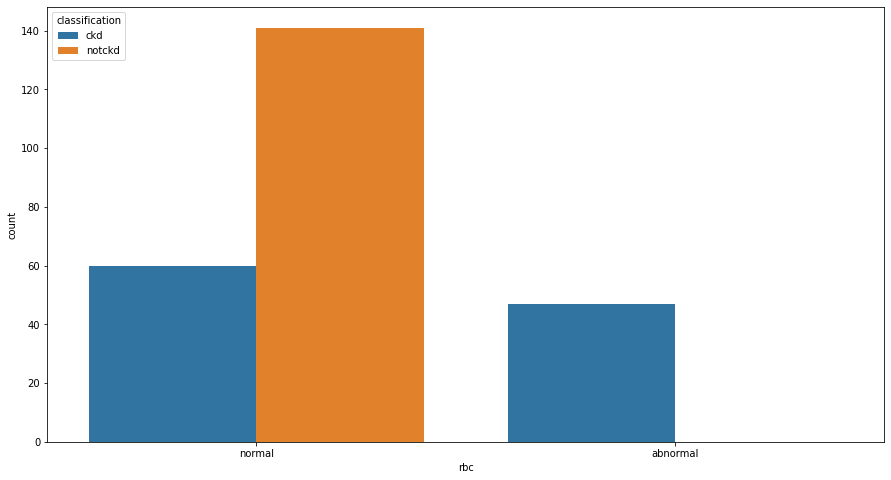

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='rbc',data=kidney,hue='classification')

From the above we can say that the normal rbc is less likely to cause CKD but abnormal rbc is more likely to cause CKD

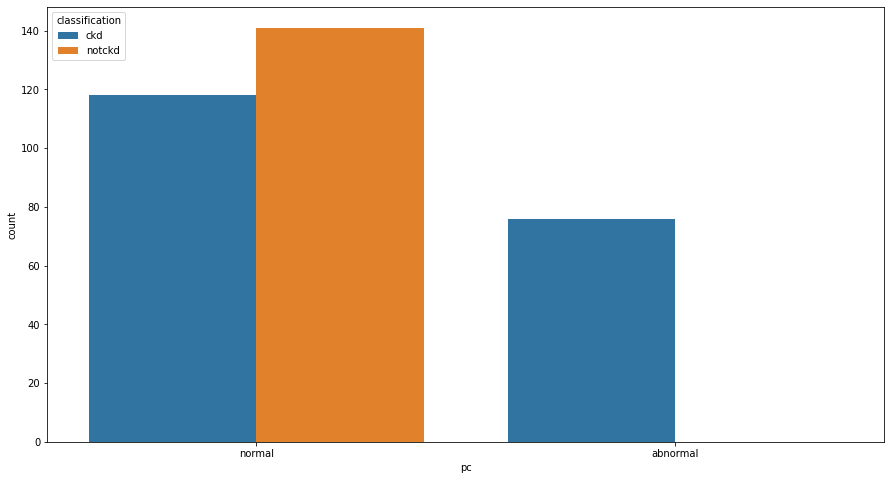

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x='pc',data=kidney,hue='classification')

Here also the same phenomena as rbc

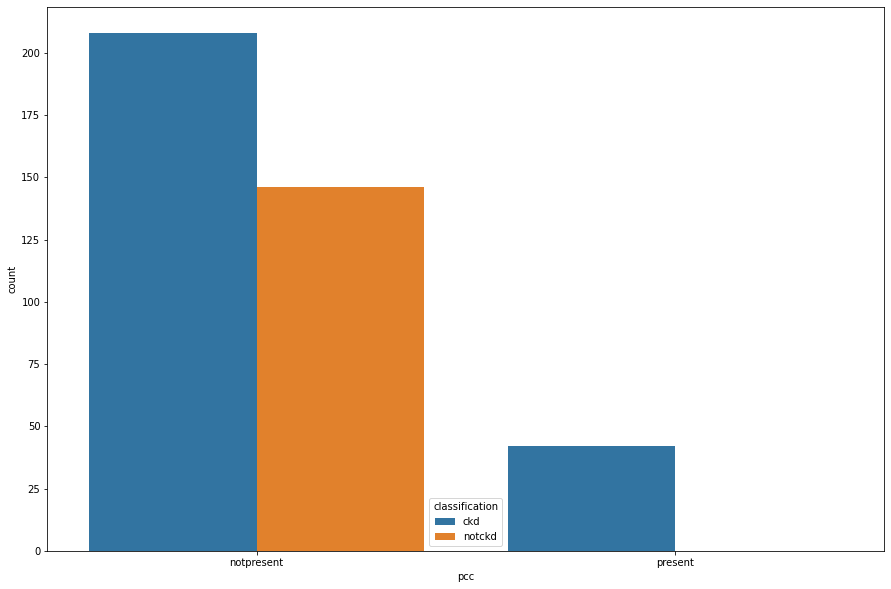

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x='pcc',data=kidney,hue='classification')

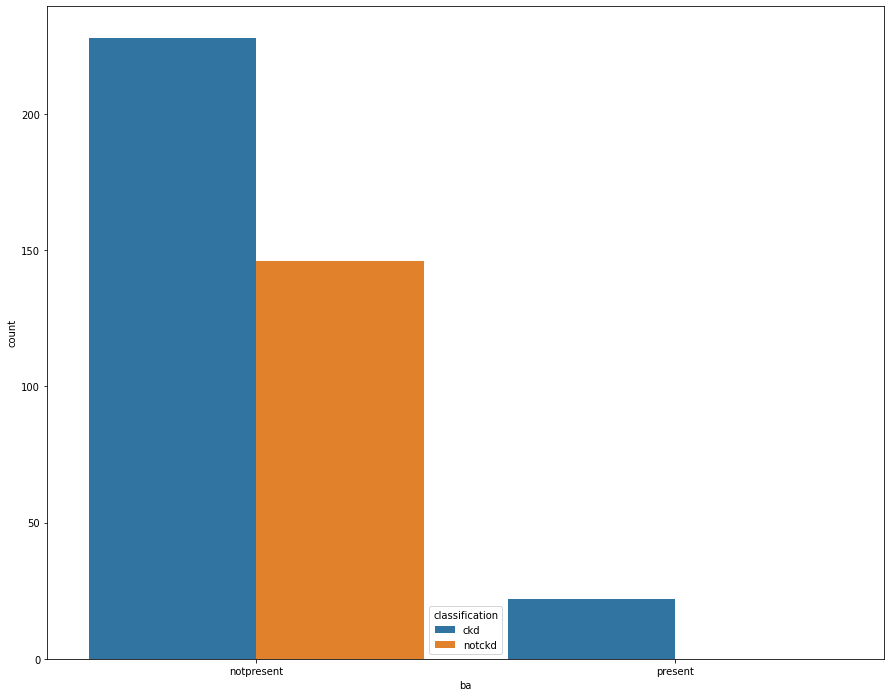

In [19]:
plt.figure(figsize=(15,12))
sns.countplot(x='ba',data=kidney,hue='classification')

In [20]:
def scatters(col1,col2):
    fig = px.scatter(kidney, x=col1, y=col2, color="classification")
    return fig.show()


In [21]:
scatters('hemo','pcv')

If hemo is less than 13 and pcv is less 40 then CKD is more likely to be infected

In [22]:
scatters('pcv','bu')

# *Data Analysis and Preprocessing*

In [23]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [24]:
obj_col=[col for col in kidney.columns if kidney[col].dtype=='object']
for col in obj_col:
    print('{} has {} values '.format(col,kidney[col].unique()))
    print('\n')
# Here I see how many unique values are present in our object data type column

rbc has [nan 'normal' 'abnormal'] values 


pc has ['normal' 'abnormal' nan] values 


pcc has ['notpresent' 'present' nan] values 


ba has ['notpresent' 'present' nan] values 


pcv has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values 


wc has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '

Here all the values of wc, rc, pcv columns are float type but due to some erroneous term, the columns have become object type

In [25]:
features=['rc','pcv','wc']
def convert_dtype(kidney,feature):
    kidney[feature] = pd.to_numeric(kidney[feature], errors='coerce')
    
for feature in features:
    convert_dtype(kidney,feature)
 # Here I convert those erroneous terms to neumeric terms and convert those columns in to float type
kidney.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [26]:
obj_col=[col for col in kidney.columns if kidney[col].dtype=='object']
for col in obj_col:
    print('{} has {} values '.format(col,kidney[col].unique()))
    print('\n')

rbc has [nan 'normal' 'abnormal'] values 


pc has ['normal' 'abnormal' nan] values 


pcc has ['notpresent' 'present' nan] values 


ba has ['notpresent' 'present' nan] values 


htn has ['yes' 'no' nan] values 


dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


cad has ['no' 'yes' '\tno' nan] values 


appet has ['good' 'poor' nan] values 


pe has ['no' 'yes' nan] values 


ane has ['no' 'yes' nan] values 


classification has ['ckd' 'notckd'] values 




In [27]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

wc, rc, pcv all have been converted into floats 

In [28]:
kidney.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Here I just checked how many nan values are present in our dataset

In [29]:
kidney.rbc.fillna(kidney.rbc.mode()[0],inplace=True)
kidney.pc.fillna(kidney.pc.mode()[0],inplace=True)
kidney.pcc.fillna(kidney.pcc.mode()[0],inplace=True)
kidney.ba.fillna(kidney.ba.mode()[0],inplace=True)
kidney.htn.fillna(kidney.htn.mode()[0],inplace=True)
kidney.dm.fillna(kidney.dm.mode()[0],inplace=True)
kidney.cad.fillna(kidney.cad.mode()[0],inplace=True)
kidney.appet.fillna(kidney.appet.mode()[0],inplace=True)
kidney.pe.fillna(kidney.pe.mode()[0],inplace=True)
kidney.ane.fillna(kidney.ane.mode()[0],inplace=True)

Here I just filled the nan values by the mode of their respective columns whose data type is object

In [30]:
def Random_value_imputation(feature):
    random_sample=kidney[feature].dropna().sample(kidney[feature].isnull().sum())               
    random_sample.index=kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(),feature]=random_sample

Random_value_imputation('age')
Random_value_imputation('bp')
Random_value_imputation('sg')
Random_value_imputation('al')
Random_value_imputation('su')
Random_value_imputation('bgr')
Random_value_imputation('bu')
Random_value_imputation('sc')
Random_value_imputation('sod')
Random_value_imputation('pot')
Random_value_imputation('hemo')
Random_value_imputation('pcv')
Random_value_imputation('wc')
Random_value_imputation('rc')


Here I filled the nan values randomly whose data type is float or integer

In [31]:
kidney.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

No nan values 

In [32]:
obj_col=kidney.select_dtypes('object').columns
for col in obj_col:
  kidney[col]=LabelEncoder().fit_transform(kidney[col])

As machine can not understand object type data so here I have encoded them in integer by using lebel encoding

In [33]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [34]:
kidney.drop('id',axis=1,inplace=True)

In [35]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,139.0,3.8,15.4,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,76.0,18.0,0.8,145.0,4.3,11.3,38.0,6000.0,3.8,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,139.0,5.0,9.6,31.0,7500.0,4.9,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,135.0,3.5,11.6,35.0,7300.0,4.6,0,3,1,0,0,0,0


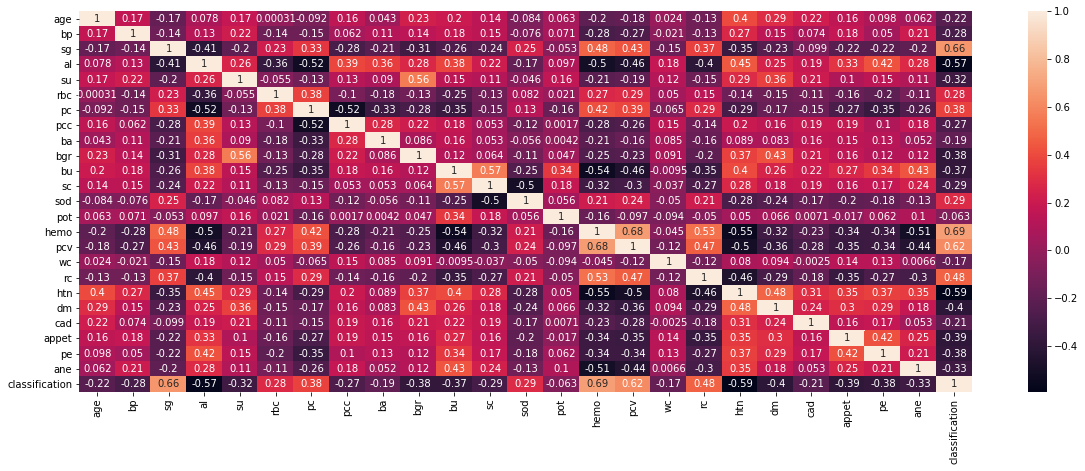

In [36]:
plt.figure(figsize=(20,7))
sns.heatmap(kidney.corr(),annot=True)

In [37]:
y=kidney.classification
n_kidney =kidney.copy()
n_kidney.drop('classification',axis=1,inplace=True)
x=n_kidney

Here I split our dataset into input feature and terget feature

In [38]:
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,139.0,3.8,15.4,44.0,7800.0,5.2,1,4,1,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,76.0,18.0,0.8,145.0,4.3,11.3,38.0,6000.0,3.8,0,3,1,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,139.0,5.0,9.6,31.0,7500.0,4.9,0,4,1,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,3,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,135.0,3.5,11.6,35.0,7300.0,4.6,0,3,1,0,0,0


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

Here I split our dataset for training and testing

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(340, 24)
(340,)
(60, 24)
(60,)


# *Model* *Building*

In [42]:
model_1= DecisionTreeClassifier()
model_1.fit(x_train,y_train)
y_pred=model_1.predict(x_test)
cla_rprt=classification_report(y_test,y_pred)
print(f'Accuracy on test data {model_1.score(x_test,y_test)} ')
print(f'Accuracy on train data {model_1.score(x_train,y_train)} ')
print(cla_rprt)

Accuracy on test data 0.9833333333333333 
Accuracy on train data 1.0 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        25

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



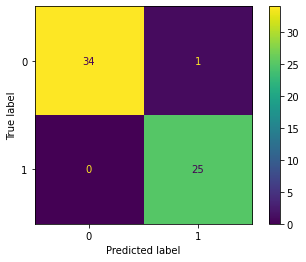

In [43]:
print(plot_confusion_matrix(model_1,x_test,y_test,values_format='0.3g'))

In [44]:
model_2=  RandomForestClassifier()
model_2.fit(x_train,y_train)
y_pred=model_2.predict(x_test)
cla_rprt=classification_report(y_test,y_pred)
print(f'Accuracy on test data {model_2.score(x_test,y_test)} ')
print(f'Accuracy on train data {model_2.score(x_train,y_train)} ')
print(cla_rprt)

Accuracy on test data 1.0 
Accuracy on train data 1.0 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



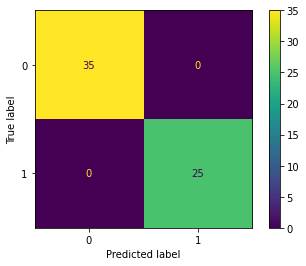

In [45]:
print(plot_confusion_matrix(model_2,x_test,y_test,values_format='0.3g'))